In [1]:
#Simple Jupyter notebook to play with Audio and wave files
#8-Feb 2020
#Copyrite KN4VYN


import wave #python libary for .wav file processing
import IPython.display

import struct #structured data handling

import matplotlib.pyplot as plt
import numpy as np
import random


import sys
print(sys.byteorder) #always good to know.



little


In [2]:
fs = 8000 #sampling frequency (samples/second).  Human voice goes up to approximately 4000Hz.  Nyquist says double that.
#note that this is not a particularly high sampling rate.  CD-quality audio is 44100 samples/second.
ts = 1/fs #time between samples


f = 440 #signal frequency.  440Hz is middle A
A = 2**8-1 #amplitude. we are creating 1-byte (8-bit), unsigned, samples.
#note that 8000/samples per second at 8-bits per sample is 64,000 bits per second when processed. This is historically a voice-grade telephone line.


t = np.arange(0,5,ts) #create a a range from 0 to 5 seconds, in ts intervals
s = np.cos(2*np.pi*f*t) #create signal

#scale and convert signal to be between 0-255
shift = abs(min(s))
s = s + shift*np.ones(len(s)) #shift up so all values are positive
mx = max(s)
s = A*s/mx #scale


In [3]:
#create the .wav file.  
#more python documentation is here: https://docs.python.org/3/library/wave.html



# wave package variables
nchannels=1 #only 1 channel; mono, not stereo
sampwidth=1 #1 byte (8 bits) per sample
framerate=fs #sample rate, in samples per second
nframes=len(t) #number of frames
comptype="NONE" #not compressed
compname="not compressed"

fileName = "middle-A-440Hz-5seconds.wav"
wavWrite = wave.open(fileName, 'wb') #open the file with write privileges
wavWrite.setnchannels(nchannels)
wavWrite.setsampwidth(sampwidth)
wavWrite.setframerate(framerate)
wavWrite.setnframes(nframes)
wavWrite.setcomptype(comptype,compname)
print(wavWrite)

for sample in s:
    wavWrite.writeframesraw(struct.pack('B', int(sample)))#set format to 'B', unsigned byte since we are doing 1-byte samples.


wavWrite.close()
                        
                        
                        
                        
                        
                        

In [4]:
#play the .wav file back
print(fileName)
IPython.display.Audio(fileName)

middle-A-440Hz-5seconds.wav


In [6]:
# lets do the same thing with a C chord
fs = 8000
ts = 1/fs


C4 = 261.63
G3 = 196 #G string
D3 = 146.8

t = np.arange(0,5,ts) #create a a range from 0 to 5 seconds, in ts intervals
s = np.cos(2*np.pi*C4*t)+np.cos(2*np.pi*G3*t)+np.cos(2*np.pi*D3*t)
shift = abs(min(s))
s = s + shift*np.ones(len(s)) #shift up so be all positive
mx = max(s)
s = A*s/mx #scale




# wave package variables
nchannels=1 #only 1 channel; mono, not stereo
sampwidth=1 #1 byte (8 bits) per sample
framerate=fs #sample rate, in samples per second
nframes=len(t) #number of frames
comptype="NONE" #not compressed
compname="not compressed"

fileName = "c-chord-5seconds.wav"
wavWrite = wave.open(fileName, 'wb') #open the file with write privileges
wavWrite.setnchannels(nchannels)
wavWrite.setsampwidth(sampwidth)
wavWrite.setframerate(framerate)
wavWrite.setnframes(nframes)
wavWrite.setcomptype(comptype,compname)
print(wavWrite)

for sample in s:
    wavWrite.writeframesraw(struct.pack('B', int(sample)))#set format to 'B', unsigned byte.


wavWrite.close()
print(fileName)
IPython.display.Audio(fileName)




c-chord-5seconds.wav


num samples read in =  1024
nchannels =  1
sampwidth =  1
framerate =  8000
nframes =  40000


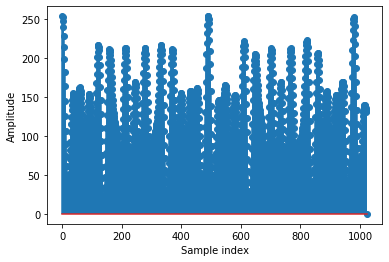

Remember: this is a chord with multiple frequencies in the signal.
Time is removed from this plot.  The x-axis is just sample index.


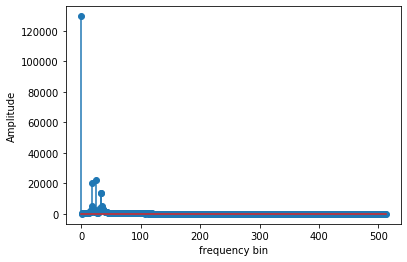

Note there is a large DC offset at 0 because we shifted all values to be positive.
Plot the Fourier Transform again without the 0 bin


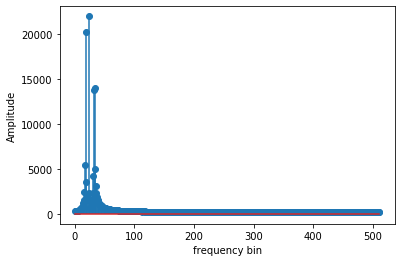

The x-axis is frequency, but it's in bins. What's a frequency bin?
The interpretation has to do with the sampling frequency fs =  8000
and the number of samples read in and used for the transform numSamplesRead =  1024 .
Each bin is fs/numSamplesRead = 7.8125  (cycles/second)


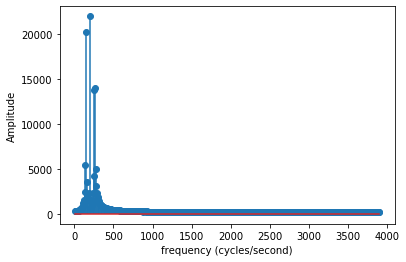

note that the peaks on the transform are approximately at the three tones in the chord: (C4, G3, D3)=( 261.63 , 196 , 146.8 )


In [8]:
#let's open some of the files and perform some analysis on them.

fileName = "c-chord-5seconds.wav"
wavRead = wave.open(fileName,'rb')
nchannels = wavRead.getnchannels()
sampwidth = wavRead.getsampwidth()
framerate = wavRead.getframerate()
nframes = wavRead.getnframes()
comptype = wavRead.getcomptype()
compname = wavRead.getcompname()


numSamplesRead = 1024
s = wavRead.readframes(numSamplesRead) #read in a specific number of samples
print("num samples read in = ",len(s))
#note that s is packed unsigned bytes.     


wavRead.close()

print("nchannels = ",nchannels)
print("sampwidth = ",sampwidth)
print("framerate = ",framerate)
print("nframes = ",nframes)


ss = np.zeros(len(s))
for i in range(0,len(ss)-1):
    ss[i] = float(s[i]) #convert the structured data to float

plt.stem(ss,use_line_collection=True)
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.show()
print('Remember: this is a chord with multiple frequencies in the signal.')
print('Time is removed from this plot.  The x-axis is just sample index.')


S = np.fft.rfft(ss)
S = abs(S) #the result of the FFT is complex.  Take the abs
plt.stem(S,use_line_collection=True)
plt.xlabel("frequency bin")
plt.ylabel("Amplitude")
plt.show()

print("Note there is a large DC offset at 0 because we shifted all values to be positive.")
print("Plot the Fourier Transform again without the 0 bin")


S = np.fft.rfft(ss)
S = abs(S) #the result of the FFT is complex.  Take the abs
plt.stem(S[1:],use_line_collection=True)
plt.xlabel("frequency bin")
plt.ylabel("Amplitude")
plt.show()

print("The x-axis is frequency, but it's in bins. What's a frequency bin?")
print("The interpretation has to do with the sampling frequency fs = ",fs)
print("and the number of samples read in and used for the transform numSamplesRead = ",numSamplesRead,".")
binSize = fs/numSamplesRead
print("Each bin is fs/numSamplesRead =",binSize," (cycles/second)")

freqAxis = binSize*np.arange(0,len(S))
plt.stem(freqAxis[1:500],S[1:500],use_line_collection=True)
plt.xlabel("frequency (cycles/second)")
plt.ylabel("Amplitude")
plt.show()
print("note that the peaks on the transform are approximately at the three tones in the chord: (C4, G3, D3)=(",C4,",",G3,",",D3,")")
